In [ ]:
# Question 6

In [54]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# Setting a theme for seaborn plots
sns.set_theme(style="whitegrid")


In [56]:
# Loading the dataset

market_segmentation = pd.read_csv('social_marketing.csv')

market_segmentation = market_segmentation.drop(columns=['Unnamed: 0'])



In [58]:
# Display the column names in your DataFrame
print(market_segmentation.columns)


Index(['chatter', 'current_events', 'travel', 'photo_sharing', 'uncategorized',
       'tv_film', 'sports_fandom', 'politics', 'food', 'family',
       'home_and_garden', 'music', 'news', 'online_gaming', 'shopping',
       'health_nutrition', 'college_uni', 'sports_playing', 'cooking', 'eco',
       'computers', 'business', 'outdoors', 'crafts', 'automotive', 'art',
       'religion', 'beauty', 'parenting', 'dating', 'school',
       'personal_fitness', 'fashion', 'small_business', 'spam', 'adult'],
      dtype='object')


In [ ]:
# Removing all records where the spam value is greater than 0 and the chatter values exceed 1.5 times the IQR plus the 75th percentile.

In [60]:
# Calculating the IQR for the 'chatter' column
iqr_chatter = stats.iqr(market_segmentation['chatter'])

# Calculating the 75th percentile for the 'chatter' column
q75_chatter = np.percentile(market_segmentation['chatter'], 75)

# Defining the threshold
chatter_threshold = q75_chatter + 1.5 * iqr_chatter

# Filtering the DataFrame
market_segmentation_filtered = market_segmentation[
    (market_segmentation['spam'] == 0) &
    (market_segmentation['chatter'] < chatter_threshold)
]

# Droping the 'spam' column
market_segmentation_filtered = market_segmentation_filtered.drop(columns=['spam'])

In [62]:
# Checking the data types of each column to identify non-numeric columns
print(market_segmentation_filtered.dtypes)


chatter             int64
current_events      int64
travel              int64
photo_sharing       int64
uncategorized       int64
tv_film             int64
sports_fandom       int64
politics            int64
food                int64
family              int64
home_and_garden     int64
music               int64
news                int64
online_gaming       int64
shopping            int64
health_nutrition    int64
college_uni         int64
sports_playing      int64
cooking             int64
eco                 int64
computers           int64
business            int64
outdoors            int64
crafts              int64
automotive          int64
art                 int64
religion            int64
beauty              int64
parenting           int64
dating              int64
school              int64
personal_fitness    int64
fashion             int64
small_business      int64
adult               int64
dtype: object


In [ ]:
# # Approach to Solving the Problem:

# - Use PCA to reduce correlated variables, followed by t-SNE to further condense the data into 2 components.
# - Cluster the resulting components to group individuals into distinct categories.


In [64]:
# Selecting only numeric columns for scaling
X_numeric = market_segmentation_filtered.select_dtypes(include=[np.number])

# Now applying scaling only to numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


In [ ]:
# Perfoirming PCA to reduce the correlated variables

In [66]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Calculateing the variance explained by each principal component
variance_explained = pca.explained_variance_
percentage_variance_explained = variance_explained / np.sum(variance_explained) * 100

# Calculateing the cumulative variance explained
cumulative_percentage_variance_explained = np.cumsum(percentage_variance_explained)

# Displaying the cumulative variance explained
cumulative_percentage_variance_explained


array([ 12.70743291,  20.97333918,  28.26167987,  34.99160995,
        41.21696589,  46.25341316,  50.98743917,  55.08046954,
        58.3463205 ,  61.35465738,  64.25042947,  66.94652701,
        69.60397835,  72.17059853,  74.65945221,  77.06431189,
        79.36763081,  81.44047043,  83.29329675,  84.89691526,
        86.29987302,  87.65254189,  88.98663654,  90.19216566,
        91.38247807,  92.55296364,  93.70335254,  94.76848531,
        95.78522534,  96.77998007,  97.64086721,  98.30835087,
        98.95064795,  99.49715914, 100.        ])

In [68]:
# Checking how many components explain less than 95% of the variance
less_than_95 = cumulative_percentage_variance_explained < 95

# Counting the number of True (i.e., components that explain less than 95% of the variance)
count_less_than_95 = np.sum(less_than_95)

# Counting the number of False (i.e., components that explain 95% or more of the variance)
count_95_or_more = np.sum(~less_than_95)

# Displaying the counts
print(f"Components explaining less than 95% of variance: {count_less_than_95}")
print(f"Components explaining 95% or more of variance: {count_95_or_more}")

Components explaining less than 95% of variance: 28
Components explaining 95% or more of variance: 7


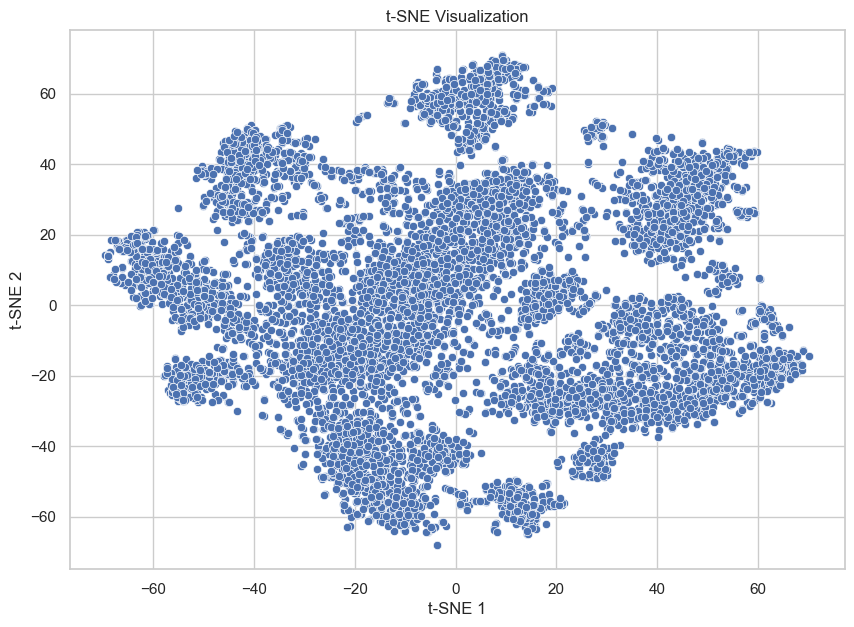

In [76]:
# Performing PCA and keeping the first 28 components
pca = PCA(n_components=28)
pca_market_segmentation = pca.fit_transform(market_segmentation)

#  Performing t-SNE on the PCA-reduced data and plotting it on a 2D plane 
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_market_segmentation)

# Creating a DataFrame with the t-SNE results
tsne_df = pd.DataFrame({
    'TSNE_1': tsne_result[:, 0],
    'TSNE_2': tsne_result[:, 1]
})

# Visualizing the t-SNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='TSNE_1', y='TSNE_2', data=tsne_df)
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

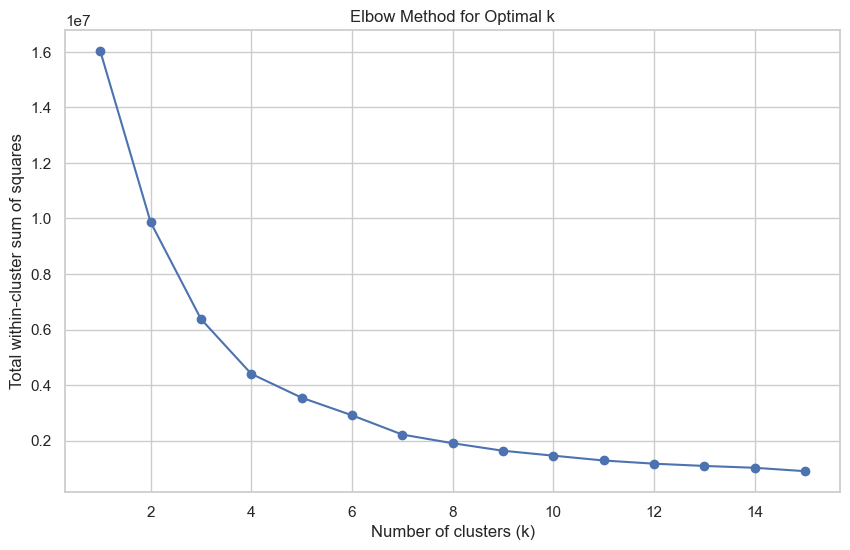

In [78]:

# Calculating WSS (Within-cluster Sum of Squares) for different numbers of clusters
wss = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_df[['TSNE_1', 'TSNE_2']])
    wss.append(kmeans.inertia_)  # inertia_ is the sum of squared distances to the nearest cluster center

# Creating a DataFrame for plotting
wss_df = pd.DataFrame({'k': range(1, 16), 'wss': wss})

# Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(wss_df['k'], wss_df['wss'], marker='o', linestyle='-')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Total within-cluster sum of squares")
plt.grid(True)
plt.show()

In [ ]:
# 𝑘 = 4
# k=4 is a clear candidate for the optimal number of clusters based on the traditional Elbow Method.
# 𝑘 = 7
# k=7 could also be a good choice if your analysis suggests that this level of clustering provides valuable insights or better fits your data's complexity.

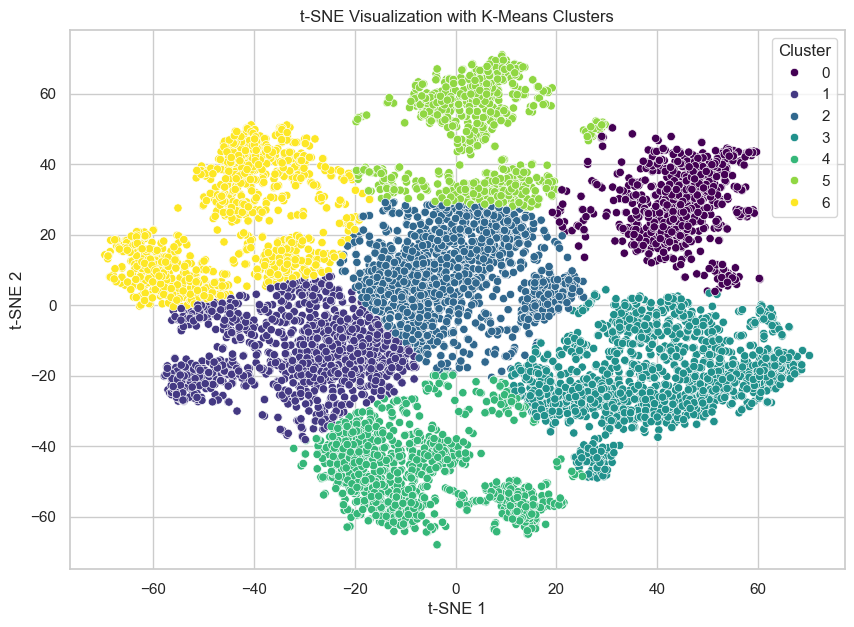

In [80]:
# Setting the optimal number of clusters
optimal_k = 7

# Performing k-means clustering on the t-SNE results
kmeans = KMeans(n_clusters=optimal_k, n_init=20, random_state=42)
tsne_df['cluster'] = kmeans.fit_predict(tsne_df[['TSNE_1', 'TSNE_2']])

# Visualizing the clusters in the t-SNE plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='cluster', palette='viridis', data=tsne_df)
plt.title("t-SNE Visualization with K-Means Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Cluster')
plt.show()

In [84]:
print(tsne_df.columns)


Index(['TSNE_1', 'TSNE_2', 'cluster'], dtype='object')


In [ ]:
# Interpreting the meaning of these clusters by examining the characteristics of each cluster, summarized by their median values.


In [86]:
# tsne_df contains the t-SNE results with the cluster assignments

#  Merging market_segmentation with tsne_df to include the cluster labels
# We'll merge using the index because there's no identifier column
market_segmentation_clustered = pd.merge(
    market_segmentation,
    tsne_df[['cluster']],  
    left_index=True,       
    right_index=True       
)

# Calculating the median of each variable
cluster_profiles = market_segmentation_clustered.groupby('cluster').median()

# Display the result
print(cluster_profiles)

         chatter  current_events  travel  photo_sharing  uncategorized  \
cluster                                                                  
0            3.0             1.0     1.0            4.0            1.0   
1            2.0             1.0     1.0            1.0            0.0   
2            6.0             1.0     1.0            3.0            1.0   
3            3.0             1.0     1.0            2.0            1.0   
4            3.0             1.0     1.0            1.0            1.0   
5            6.0             1.0     1.0            4.0            1.0   
6            3.0             1.0     3.0            1.0            1.0   

         tv_film  sports_fandom  politics  food  family  ...  religion  \
cluster                                                  ...             
0            0.0            1.0       0.0   1.0     1.0  ...       0.0   
1            1.0            0.0       0.0   0.0     0.0  ...       0.0   
2            0.0            1.0      

In [92]:
# # General Cluster Characteristics

# ### Cluster 0
# This cluster has a high engagement in "photo_sharing," "beauty," and "fashion." It could represent a segment of users who are highly active in visual content and are possibly influencers or individuals interested in aesthetics.

# ### Cluster 1
# This cluster has very low or zero engagement across most categories, suggesting that these users might be less active or have more focused interests in specific areas like "current_events" and "photo_sharing."

# ### Cluster 2
# This cluster shows higher engagement in "politics," "personal_fitness," and "health_nutrition." This group might represent health-conscious individuals who are also politically active.

# ### Cluster 3
# This group has a noticeable interest in "family," "politics," and "sports_fandom," which might indicate family-oriented individuals who are also engaged in sports and political discussions.

# ### Cluster 4
# This cluster is characterized by high engagement in "sports_fandom," "fashion," and "religion." It might represent users who are very active in sports, fashion, and possibly religious discussions or content.

# ### Cluster 5
# This cluster has higher values in "sports_fandom" and "politics," with some engagement in "photo_sharing" and "family." It might represent users who are active in both sports and political discussions, possibly sharing content related to these topics.

# ### Cluster 6
# This group has elevated interest in "politics," "personal_fitness," and "school," possibly indicating students or young professionals who are engaged in political discussions and personal fitness.


In [ ]:
# # Marketing Implications

# ### Targeted Campaigns
# The data suggests that targeted marketing efforts could be highly effective. For example:

# - **Fashion and Beauty**: Cluster 0 could be targeted with campaigns related to fashion and beauty products.
# - **Health and Fitness**: Cluster 2 and Cluster 6 could be approached with health, fitness, and wellness products.
# - **Sports**: Clusters 4 and 5 are ideal for sports-related campaigns.
# - **Politics and Social Issues**: Clusters 2, 3, 4, and 6 might respond well to content related to politics and social issues.
